In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from qiskit import QuantumCircuit

qasm_dir = "/Users/debarthipal/Library/CloudStorage/OneDrive-IBM/Desktop/VS files/cutting+obp_new_git_env/QASM_circuits_small"
qasm_files = sorted([
    f for f in os.listdir(qasm_dir)
    if f.endswith(".qasm")
])
print(qasm_files)

['adder_n10.qasm', 'adder_n4.qasm', 'basis_change_n3.qasm', 'basis_trotter_n4.qasm', 'bell_n4.qasm', 'cat_state_n4.qasm', 'deutsch_n2.qasm', 'dnn_n2.qasm', 'dnn_n8.qasm', 'error_correctiond3_n5.qasm', 'fredkin_n3.qasm', 'grover_n2.qasm', 'hhl_n7.qasm', 'hs4_n4.qasm', 'iswap_n2.qasm', 'linearsolver_n3.qasm', 'lpn_n5.qasm', 'qaoa_n3.qasm', 'qaoa_n6.qasm', 'qec_en_n5.qasm', 'qft_n4.qasm', 'qpe_n9.qasm', 'qrng_n4.qasm', 'quantumwalks_n2.qasm', 'sat_n7.qasm', 'simon_n6.qasm', 'teleportation_n3.qasm', 'toffoli_n3.qasm', 'variational_n4.qasm', 'vqe_n4.qasm', 'wstate_n3.qasm']


In [3]:
from circuit_cut_subexps_copy import perform_cutting_copy
from qiskit_ibm_runtime.fake_provider import FakeTorino
backend = FakeTorino()


In [4]:
from qiskit_addon_obp.utils.simplify import OperatorBudget
op_budget = OperatorBudget(max_qwc_groups=2)


In [20]:
from qiskit import QuantumCircuit

def create_copy(circuit : QuantumCircuit)-> QuantumCircuit | None :
    if circuit.num_clbits > 0: # circuit has measurement
        circuit.remove_final_measurements(inplace=True)
    if circuit.num_clbits == 0:
        return circuit
    new_circuit = QuantumCircuit(circuit.num_qubits)
    try:
        for item in circuit.data:
            if item.operation.name == 'measure' or item.operation.name == 'barrier':
                continue

            else:
                if item.operation.num_qubits == 1:
                    q0 = item.qubits[0]._index
                    new_circuit.append(item,q0)
                elif item.operation.num_qubits == 2:
                    q0 = item.qubits[0]._index
                    q1 = item.qubits[1]._index
                    new_circuit.append(item,q0,q1)
        return new_circuit
    except:
        return None

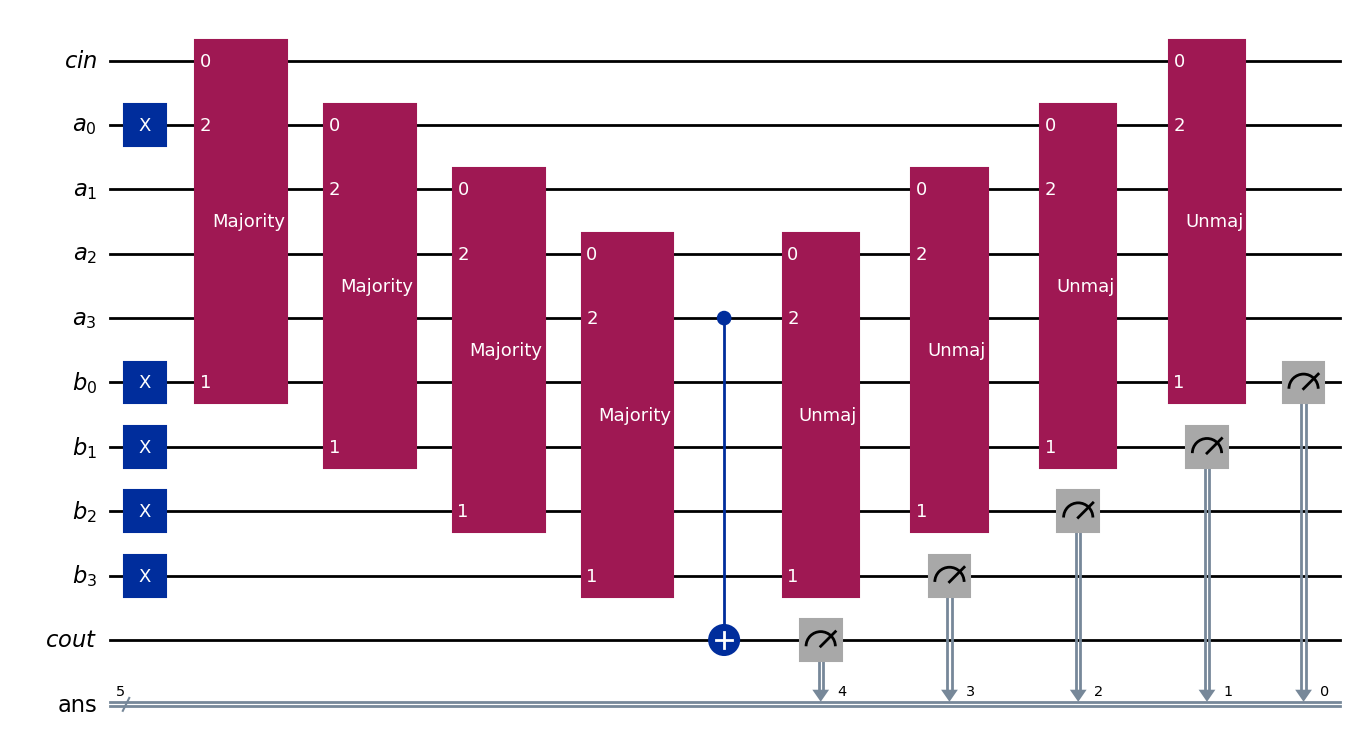

In [21]:
qc=QuantumCircuit.from_qasm_file("/Users/debarthipal/Library/CloudStorage/OneDrive-IBM/Desktop/VS files/cutting+obp_new_git_env/QASM_circuits_small/adder_n10.qasm")
qc.draw("mpl")

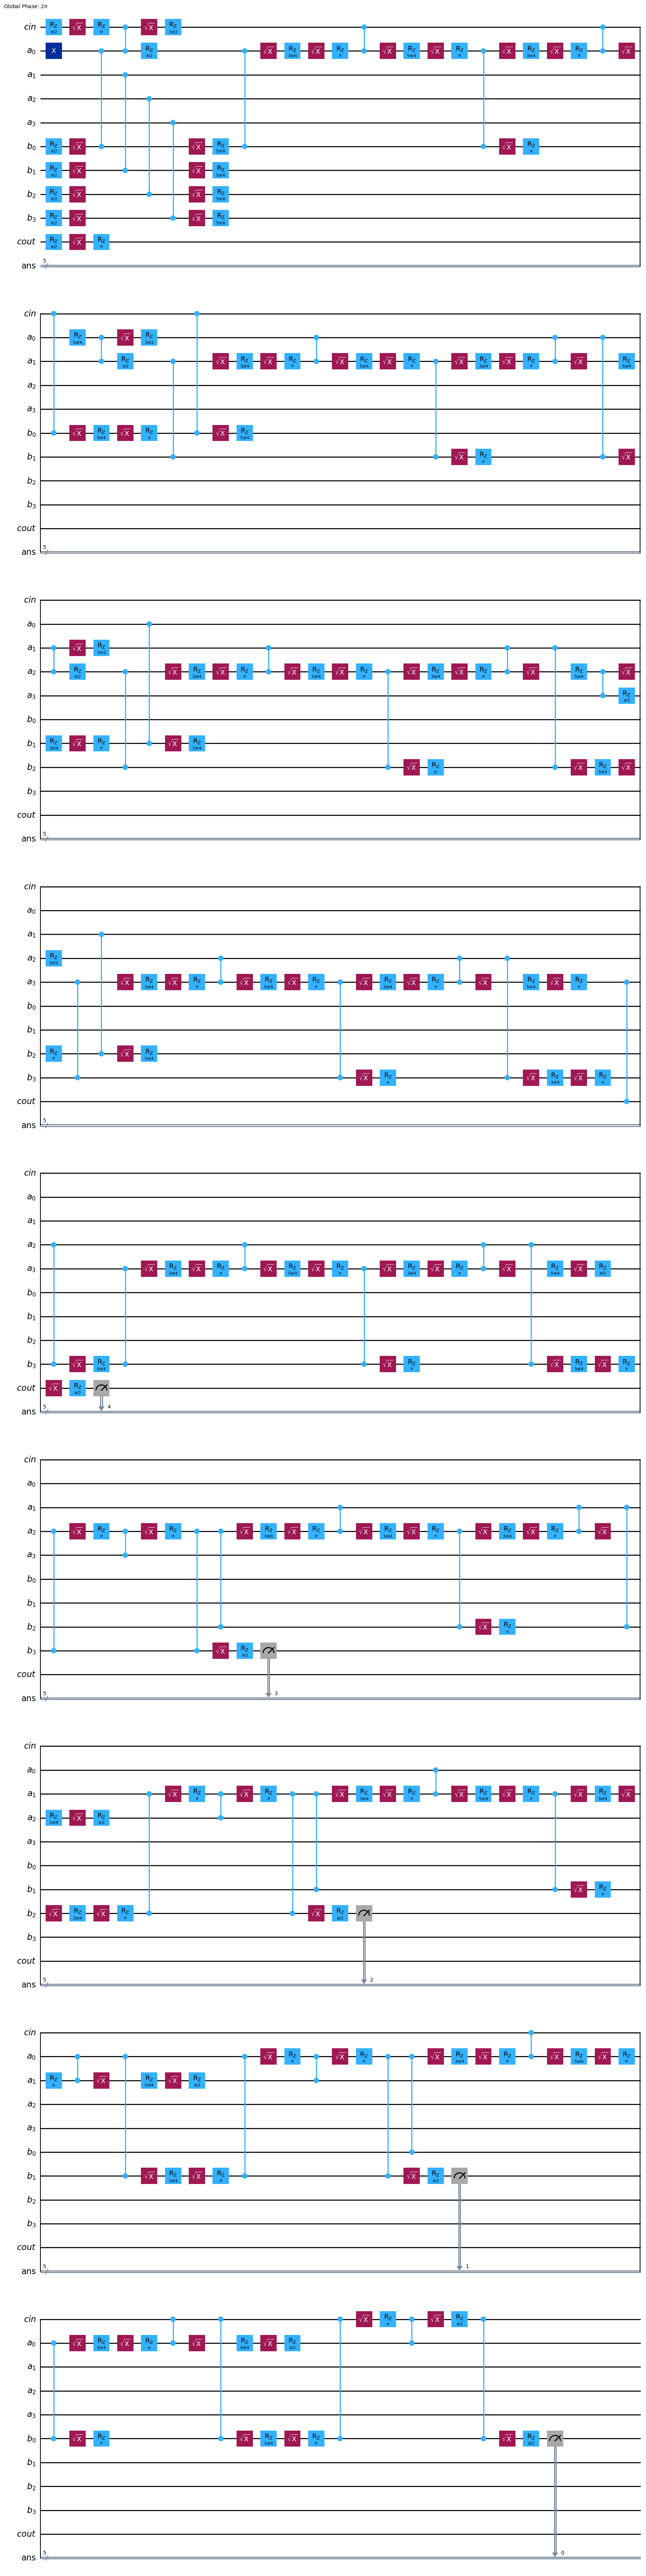

In [22]:
from qiskit.transpiler import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, basis_gates=backend.configuration().basis_gates, seed_transpiler=1)
synth_circuit = pm.run(qc)
synth_circuit.draw("mpl")

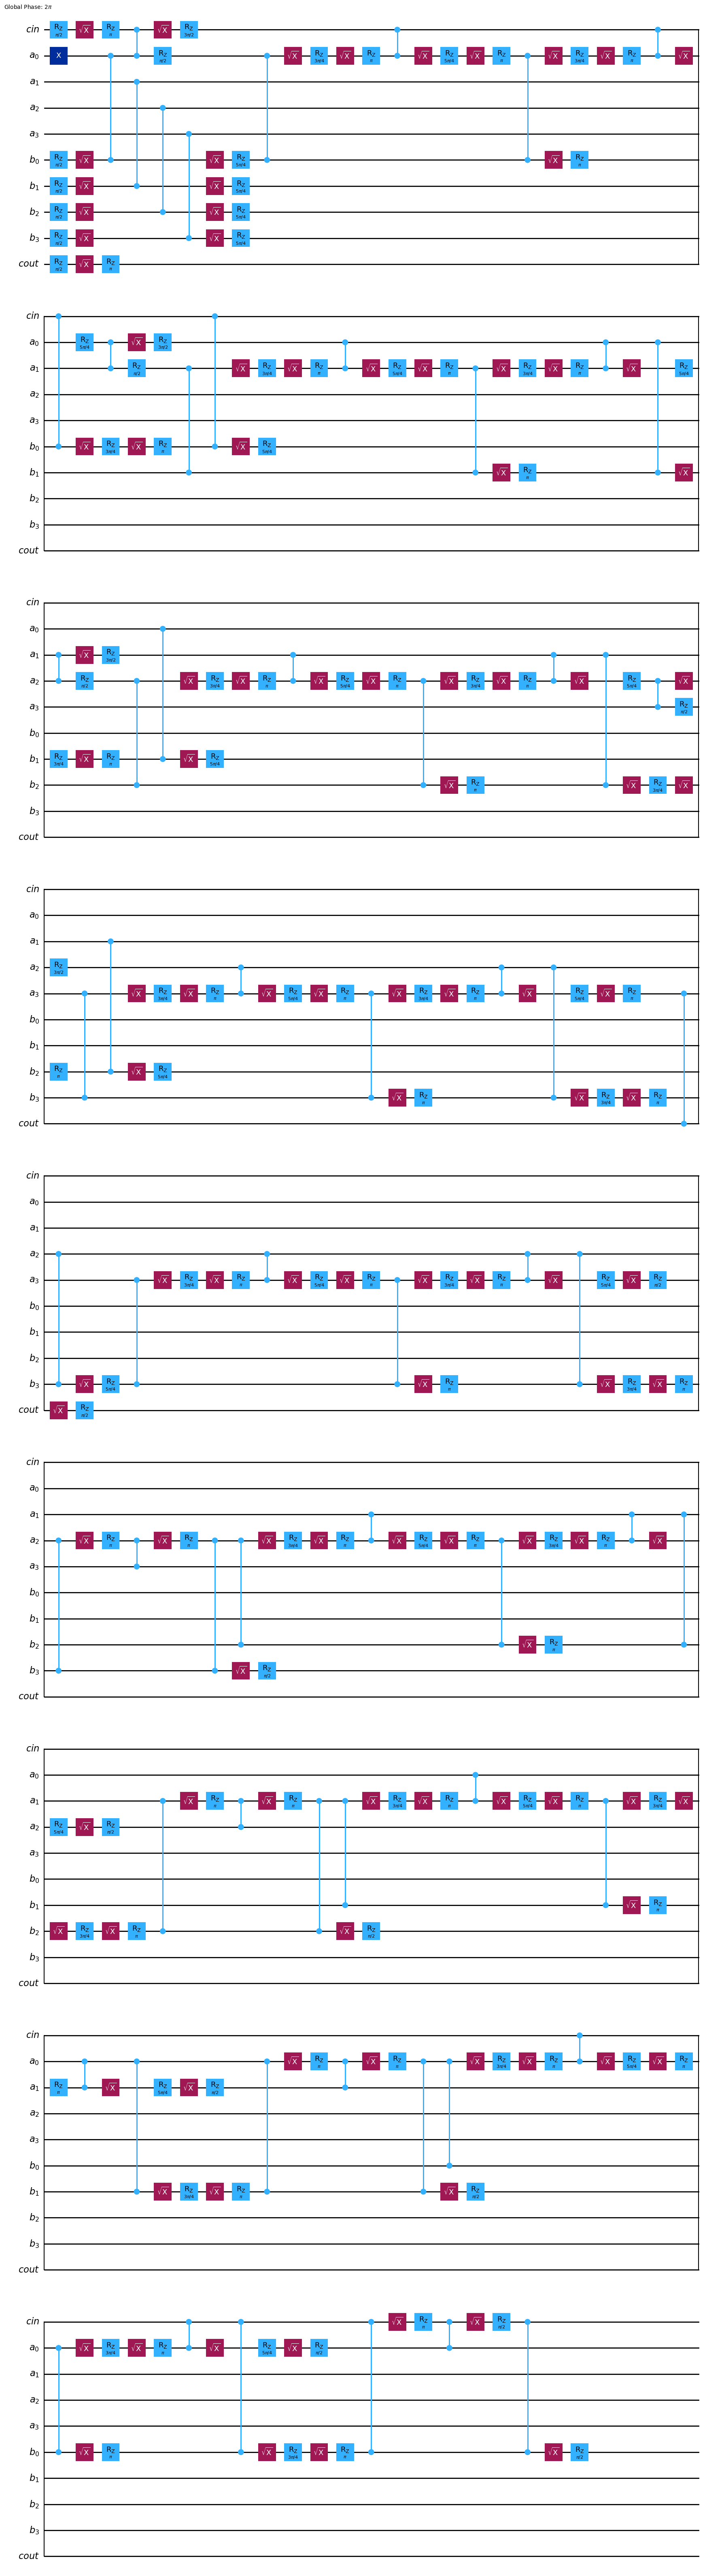

In [23]:
circuit = create_copy(synth_circuit)
circuit.draw("mpl")

In [6]:
import json
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager

circ_dic={}
pm = generate_preset_pass_manager(optimization_level=3, basis_gates=backend.configuration().basis_gates, seed_transpiler=1)

for index, file in enumerate(qasm_files, start=1):
    print(file)
    n=QuantumCircuit.from_qasm_file(file).num_qubits
    observable_terms = [
            "I"*(i-1) + "Z" + "I"*(n - i)
            for i in range(1, n+1)
        ]
    observable = SparsePauliOp(observable_terms, coeffs=[1/(n)] * (n))
    circuit=QuantumCircuit.from_qasm_file(file)
    circuit = pm.run(circuit)
    circuit = create_copy(circuit)
    print(type(circuit))
    if type(circuit) is not QuantumCircuit:
        print("Entered if ")
        circ_dic[index] = {"filename":file, 
                            "num_subexp_without_obp": None, 
                            "num_subexp_with_obp": None
                            }
    else:
        print("Entered else")
        number_subexp_without_obp, number_subexp_with_obp = perform_cutting_copy(circuit, observable,backend,op_budget)
        circ_dic[index] = {"filename":file, 
                            "num_subexp_without_obp": number_subexp_without_obp, 
                            "num_subexp_with_obp":number_subexp_with_obp,
                            }
        
    json_obj=json.dumps(circ_dic, indent=4)
    with open("small_cuts_with_and_without_obp_for_max_qwc_group_2_copy.json", "w") as f:
         f.write(json_obj)   #Saving to a JSON file

adder_n10.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
128
<class 'NoneType'>
adder_n4.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
432
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
144
144
basis_change_n3.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
2592
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
24
24
basis_trotter_n4.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
None
bell_n4.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
12
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
24
24
cat_state_n4.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
12
<class 'NoneType'>
deutsch_n2.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
1
<class 'NoneType'>
dnn_n2.qasm
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Entered else
1
